# Diagnosis of COVID-19 and it's clinic spectrum

![img](https://storage.googleapis.com/kaggle-datasets-images/574076/1040311/f8df71d8727691ca6a4fc1895bb134c3/dataset-cover.png?t=2020-03-28-00-00-16)

Background
The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

Dataset
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

Task Details
TASK 1
• Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

Expected Submission
Submit a notebook that implements the full lifecycle of data preparation, model creation and evaluation. Feel free to use this dataset plus any other data you have available. Since this is not a formal competition, you're not submitting a single submission file, but rather your whole approach to building a model.

Evaluation
This is not a formal competition, so we won't measure the results strictly against a given validation set using a strict metric. Rather, what we'd like to see is a well-defined process to build a model that can deliver decent results (evaluated by yourself).

Our team will be looking at:

Model Performance - How well does the model perform on the real data? Can it be generalized over time? Can it be applied to other scenarios? Was it overfit?
Data Preparation - How well was the data analysed prior to feeding it into the model? Are there any useful visualisations? Does the reader learn any new techniques through this submission? A great entry will be informative, thought provoking, and fresh all at the same time.
Documentation - Are your code, and notebook, and additional data sources well documented so a reader can understand what you did? Are your sources clearly cited? A high quality analysis should be concise and clear at each step so the rationale is easy to follow and the process is reproducible.
Questions and More Info
Additional questions and clarifications can be obtained at data4u@einstein.br

Answers to most voted questions
Missing data
Decision making by health care professionals is a complex process, when physicians see a patient for the first time with an acute complaint (e.g., recent onset of fever and respiratory symptoms) they will take a medical history, perform a physical examination, and will base their decisions on this information. To order or not laboratory tests, and which ones to order, is among these decisions, and there is no standard set of tests that are ordered to every individual or to a specific condition. This will depend on the complaints, the findings on the physical examination, personal medical history (e.g., current and prior diagnosed diseases, medications under use, prior surgeries, vaccination), lifestyle habits (e.g., smoking, alcohol use, exercising), family medical history, and prior exposures (e.g., traveling, occupation).
The dataset reflects the complexity of decision making during routine clinical care, as opposed to what happens on a more controlled research setting, and data sparsity is, therefore, expected.

Variables in addition to laboratory results
We understand that clinical and exposure data, in addition to the laboratory results, are invaluable information to be added to the models, but at this moment they are not available.

Additional laboratory variables
A main objective of this challenge is to develop a generalizable model that could be useful during routine clinical care, and although which laboratory exams are ordered can vary for different individuals, even with the same condition, we aimed at including laboratory tests more commonly order during a visit to the emergency room. So, if you found some additional laboratory test that was not included, it is because it was not considered as commonly order in this situation.

### Librairy

In [1]:
#pip install snapml

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,roc_auc_score

from scipy.stats import ks_2samp
from imblearn.over_sampling import SMOTE
import shape

In [3]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [4]:
from tqdm import trange,tqdm_notebook
from time import sleep 
for i in trange(4,desc="1st loop"):
    for j in trange(10,desc="2nd loop"):
        sleep(0.01)


2nd loop: 100%|██████████| 10/10 [00:00<00:00, 97.12it/s]

2nd loop: 100%|██████████| 10/10 [00:00<00:00, 98.04it/s]

2nd loop: 100%|██████████| 10/10 [00:00<00:00, 98.03it/s]

2nd loop: 100%|██████████| 10/10 [00:00<00:00, 98.05it/s]

1st loop: 100%|██████████| 4/4 [00:00<00:00,  9.39it/s]


In [5]:
#from snapml import RandomForestClassifier,LinearRegression,LogisticRegression

### Read Data

In [6]:
df = pd.read_excel("/data/notebook_files/dataset.xlsx")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Resume :

This notebook aims to predict if a patient is infected with COVID-19, given a set of clinical features.

The dataset used was kindly provided by Hospital Israelita Albert Eistein, consisting of 5644 records and 101 variables.

The study is divided as followed:

- Basic EDA: Target Distribution and Missing Data
- Attempt to input missing data with regression
- Use smaller dataset containing no nulls (602 records and 18 variables)
- Perform SMOTE to oversample minority class
- Conduct GridSearch with some ML models (RF, LR, KNN, SVM)
- Inspect model precitions using SHAP

- Conclusion

### Distribution of Target :

In [7]:
#Transform to numeric
df["SARS-Cov-2 exam result"] = df['SARS-Cov-2 exam result'].map({"positive":1,'negative':0})

#Map detected/not_detected and positive/negative to 1 and 0 
df = df.replace({"positive":1,"negative":0,'detected':1,'not_detected':0})

df['SARS-Cov-2 exam result'].value_counts(normalize = True)

0 0.901134
1 0.098866
Name: SARS-Cov-2 exam result, dtype: float64

Note: 

This is an unbalanced dataset. As we can see, only 10% of the observations have tested positive. Will have to take this into account.

In [8]:
df.dtypes

Patient ID object
Patient age quantile int64
SARS-Cov-2 exam result int64
Patient addmited to regular ward (1=yes, 0=no) int64
Patient addmited to semi-intensive unit (1=yes, 0=no) int64
 ... 
HCO3 (arterial blood gas analysis) float64
pO2 (arterial blood gas analysis) float64
Arteiral Fio2 float64
Phosphor float64
ctO2 (arterial blood gas analysis) float64
Length: 111, dtype: object

In [9]:
df.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.098866,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.298509,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [10]:
df['SARS-Cov-2 exam result'].head(3)

0 0
1 0
2 0
Name: SARS-Cov-2 exam result, dtype: int64

### Percentage of Nulls by Column

In [11]:
dfNull_pct = df.isna().mean().round(4)*100
dfNull_pct.sort_values(ascending=False)

Urine - Sugar 100.0
Mycoplasma pneumoniae 100.0
Partial thromboplastin time (PTT)  100.0
Prothrombin time (PT), Activity 100.0
D-Dimer 100.0
 ... 
SARS-Cov-2 exam result 0.0
Patient age quantile 0.0
Patient addmited to semi-intensive unit (1=yes, 0=no) 0.0
Patient addmited to intensive care unit (1=yes, 0=no) 0.0
Patient ID 0.0
Length: 111, dtype: float64

Note : 

Aside from target unbalance, it seems that we have a lot of nulls in our dataset. In fact, we have columns with all null values. Let's check this distribution:

<AxesSubplot:ylabel='Frequency'>

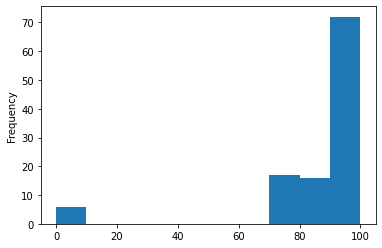

In [12]:
dfNull_pct.plot(kind='hist')

Note: 

The situation is bad. Most of the features have at least 80% of null values, with a high amout above 90%. One could choose to try to input those values, but that would be a colossal assumption (to input 90% based on 10%) and render our model useless. Garbabe In, Garbage Out. It may hurt, but I chose to drop all columns containing at least 90% of null values.

### Remove Feature with > 90 % nullvalues 

In [13]:
nulls = dfNull_pct[dfNull_pct > 90 ]
df = df[[col for col in df.columns if col not in nulls]]
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


Note :

That left us with 39 variables out of 101.

Next, I will check the variances to see if there is any variable with a single value.


### Check Variances 

In [14]:
features = [col for col in df.columns if col not in ["Patient ID",
                                                     "Patient addmited to regular war(1=yes, 0=no)",
                                                     "Patient addmited to semi-intensive unit (1=yes ,0=no)",
                                                     "Patient addmited to intensive care unit (1=yes, 0=no",
                                                     "SARS-Cov-2 exam result"]]
df[features].var()

Patient age quantile 33.384166
Patient addmited to regular ward (1=yes, 0=no) 0.013804
Patient addmited to semi-intensive unit (1=yes, 0=no) 0.008782
Patient addmited to intensive care unit (1=yes, 0=no) 0.007213
Hematocrit 1.001661
Hemoglobin 1.001661
Platelets 1.001664
Mean platelet volume 1.001672
Red blood Cells 1.001664
Lymphocytes 1.001664
Mean corpuscular hemoglobin concentration (MCHC) 1.001664
Leukocytes 1.001664
Basophils 1.001664
Mean corpuscular hemoglobin (MCH) 1.001664
Eosinophils 1.001664
Mean corpuscular volume (MCV) 1.001664
Monocytes 1.001667
Red blood cell distribution width (RDW) 1.001664
Respiratory Syncytial Virus 0.036957
Influenza A 0.013127
Influenza B 0.053674
Parainfluenza 1 0.002216
CoronavirusNL63 0.032200
Rhinovirus/Enterovirus 0.201892
Coronavirus HKU1 0.014585
Parainfluenza 3 0.007347
Chlamydophila pneumoniae 0.006617
Adenovirus 0.009530
Parainfluenza 4 0.013866
Coronavirus229E 0.006617
CoronavirusOC43 0.005887
Inf A H1N1 2009 0.067281
Bordetella pertussis 0.001478
Metapneumovirus 0.010255
Parainfluenza 2 0.000000
Influenza B, rapid test 0.056254
Influenza A, rapid test 0.059466
dtype: float64

Note: 

We can see that variable "Parainfluenza 2" has 0 variance, meaning it has only one value. Will drop that column.

In [15]:
features

['Patient age quantile',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test']

In [16]:
len(features)

37

In [17]:
df.drop('Parainfluenza 2',axis=1 ,inplace=True)
features.remove("Parainfluenza 2")
len(features)

36

### Create 'has_disesase' variable:

I've realized that the last 19 columns of the dataset are all related to the presence of antigens - all those variables are binary. When we analyze them one by one, the amount of nulls is very high. But, if we take the sum rowise, the null percentage decreases. This variable indicates, for each patient, if at least one of those variables is positive.

Here I am making an assumption to fill the remaining nulls: if all those columns are null, I'll assume that the patient doesn't have any of those diseases (has_disease = 0). There might be cases where this is false and the person simply wasn't tested, but it may be a good approximation.

In [18]:
df['has_disease'] = df[df.columns[20:]].sum(axis=1)
df.loc[df["has_disease"] > 1,'has_disease'] =1
df['has_disease'].value_counts(normalize=True)

0.0 0.865344
1.0 0.134656
Name: has_disease, dtype: float64

Note : 

13% percent of the patients have tested positive for at least one of the antigens. Now let's see how the target behaves for those people:

In [19]:
df[df["has_disease"] == 1]['SARS-Cov-2 exam result'].value_counts(normalize=True)

0 0.981579
1 0.018421
Name: SARS-Cov-2 exam result, dtype: float64

Note:

13% percent of the patients have tested positive for at least one of the antigens. Now let's see how the target behaves for those people:

### Input "disease" variable with 0 :

Here, I am making a pretty big assumption: in cases where it was not informed if the patient had the virus/disease, I will assume that he didn't have it.

In [20]:
dfClean = df.copy()
df[df.columns[20:]] = df[df.columns[20:]].fillna(0)

### Input -'blood variables' via regression (using Age)

For the other variables, which I called 'blood variables' and are all continuous, I'll attempt to input missing values via Linear Regression, using Age as my independent variable. This is a big hypothesis and will only work if there is a clear relationship between variable and age, which I don't expect to happen. Still, I'll give it a try nonetheless.


In [21]:
df[df.columns[20:]][:5]

,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
for feature in df[df.columns[6:20]]:
    df_age_var = df.dropna(axis=0, subset=['Patient age quantile', feature]).loc[:, ['Patient age quantile',
                                                                                          feature]]
    missing = df[feature].isnull()
    age_missing = pd.DataFrame(df['Patient age quantile'][missing])

    X = df_age_var[['Patient age quantile']]
    y = df_age_var[feature]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lm = LinearRegression().fit(X_train, y_train)

    df.loc[df[feature].isna(), feature] = lm.predict(age_missing)
    
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
0,44477f75e8169d2,13,0,0,0,0,0.034267,0.022490,-0.070137,0.061030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,a46b4402a0e5696,8,0,0,0,0,-0.041190,-0.019496,0.052728,-0.040502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,0,0,0,0,-0.086463,-0.044687,0.126447,-0.101422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,0,0,0,0,0.064449,0.039284,-0.119284,0.101643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


for feature in df[df.columns[6:20]]:
    df_age_var = df.dropna(axis=0 , subset=['Patient age quantile',feature]).loc[:,['Patient age quantile',feature]]
    missing = df[feature].isnull()

    age_missing = pd.DataFrame(df['Patient age quantile'][missing])
    X = df_age_var[['Patient age quantile']]
    y = df_age_var[feature]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                     random_state=42)
    lm = LinearRegression().fit(X_train,y_train)
    df.loc[df[feature].isna(),feature] = lm.predict(age_missing)
    
df.head()

In [23]:
X_train[:5]

,Patient age quantile
34,17
4061,13
5017,18
1319,16
865,1


In [24]:
df.isna().sum().sum()

0

Note: 

As one can see, after imputation, there are no nulls left on the dataset. It is ready for modeling.

However, let's check how our regression is imputing the values. Let's take, for instance, Hematocrit:

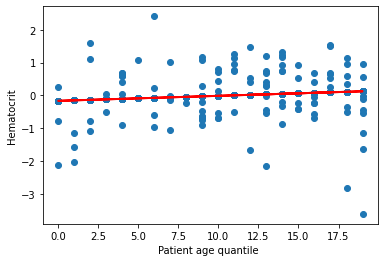

In [25]:
df_age_var = df.dropna(axis=0,subset=["Patient age quantile","Hematocrit"]).loc[:,['Patient age quantile',"Hematocrit"]]
missing_hem = df['Hematocrit'].isnull()
age_missing_hem = pd.DataFrame(df['Patient age quantile'][missing_hem])

X = df_age_var[['Patient age quantile']]
y = df_age_var['Hematocrit']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lm = LinearRegression().fit(X_train,y_train)
y_pred = lm.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red',lw=2)
plt.xlabel("Patient age quantile ")
plt.ylabel("Hematocrit")
plt.show()

Note:

We observe that the variable has very high heteroskedasticity, i.e., high dispersion. Since y values vary greatly for the same value of x (age), we are basically just inputing by the mean - which, of course, won't represent real data.

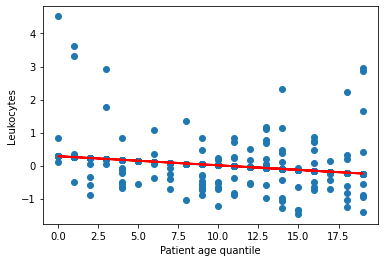

In [26]:
df_age_var = df.dropna(axis=0,subset=['Patient age quantile','Leukocytes']).loc[:,["Patient age quantile","Leukocytes"]]

missing_leu = df['Leukocytes'].isnull()
age_missing_leu = pd.DataFrame(df['Patient age quantile'][missing_leu])


X = df_age_var[['Patient age quantile']]
y = df_age_var['Leukocytes']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

lm = LinearRegression().fit(X_train,y_train)
y_pred = lm.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red',lw=2)
plt.xlabel("Patient age quantile")
plt.ylabel("Leukocytes")
plt.show()

Note :

The same for Leukocytes. Even though the line slightly captures the trend, it is still not even close to ideal.

Let's try to build a simple Random Forest model and see the tragedy that awaits us.

### Simple Random Forest Model

In [27]:
def fitRandomForest(model) :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #ConfusionMatrix and Accuracy
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classification Report \n",classification_report(y_test,y_pred))
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Recall Score:",recall_score(y_test,y_pred))
    #AUC and KS
    print("AUC:",roc_auc_score(y_test,y_pred))
    print("KS:",ks_2samp(y_pred[y_test==0],y_pred[y_test == 1]).statistic)

X = df[features].values
y = df['SARS-Cov-2 exam result'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Split between test and train !")

#Apply RandomForest:
rf = RandomForestClassifier(n_estimators=100,max_features="sqrt",random_state=42)
fitRandomForest(rf)


Split between test and train !
Confusion Matrix: 
 [[1019    2]
 [ 101    7]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.78      0.06      0.12       108

    accuracy                           0.91      1129
   macro avg       0.84      0.53      0.54      1129
weighted avg       0.90      0.91      0.87      1129

Accuracy Score: 0.9087688219663419
Recall Score: 0.06481481481481481
AUC: 0.5314279754779265
KS: 0.06285595095585302


Note :

Expected. The model basically predicts all the time that the individual is not infected (ridiculous Recall). We won't be able to use the whole dataset, much less inpute the missing values this way.

### Improve the dataset

In [28]:
print("Total Columns:",dfClean.shape[1])
dfClean.isna().sum(axis=1).value_counts()

Total Columns: 39


32 3596
16 917
30 458
2 263
14 166
18 139
0 99
3 4
29 1
27 1
dtype: int64

Note:

Out of 5644 rows, 3596 have 32 columns with missing values (out of 39). This gives us a place to start.

The first reduction will be to trim the dataset to one whose rows don't have more than 26 null columns.

In [29]:
df_red = dfClean[dfClean.isna().sum(axis=1)<26]
df_red.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,5f1ed301375586c,17,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
13,0fbafd910aa8078,13,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


Let's check null percentage by column once again.

In [30]:
dfNull_pct = df_red.isna().mean().round(4)*100
dfNull_pct.sort_values(ascending=False)

Influenza A, rapid test 77.20
Influenza B, rapid test 77.20
Mean platelet volume 62.28
Monocytes 62.15
Red blood cell distribution width (RDW) 62.09
Lymphocytes 62.09
Mean corpuscular volume (MCV) 62.09
Mean corpuscular hemoglobin (MCH) 62.09
Basophils 62.09
Leukocytes 62.09
Mean corpuscular hemoglobin concentration (MCHC) 62.09
Eosinophils 62.09
Red blood Cells 62.09
Hemoglobin 62.09
Hematocrit 62.09
Platelets 62.09
CoronavirusNL63 14.86
Parainfluenza 4 14.86
Adenovirus 14.86
Chlamydophila pneumoniae 14.86
Parainfluenza 3 14.86
Coronavirus HKU1 14.86
Rhinovirus/Enterovirus 14.86
Influenza B 14.86
Parainfluenza 1 14.86
Influenza A 14.86
Respiratory Syncytial Virus 14.86
Inf A H1N1 2009 14.86
Metapneumovirus 14.86
Bordetella pertussis 14.86
CoronavirusOC43 14.86
Coronavirus229E 14.86
Patient ID 0.00
Patient age quantile 0.00
Patient addmited to intensive care unit (1=yes, 0=no) 0.00
Patient addmited to semi-intensive unit (1=yes, 0=no) 0.00
Patient addmited to regular ward (1=yes, 0=no) 0.00
SARS-Cov-2 exam result 0.00
has_disease 0.00
dtype: float64

Note: 

We can see that blood variables have equal amount of nulls. For my modeling, I will be considering only the rows containing full data on blood variables. The effect of the other columns, hopefully, will be concentrated on the "has_disease" variable. This way, I can keep both "types" of variables in modeling

In [31]:
df_red = df_red[df_red['Leukocytes'].notna()]
dfNull_pct = df_red.isna().mean().round(4)*100
dfNull_pct.sort_values(ascending=False)

Influenza A, rapid test 67.44
Influenza B, rapid test 67.44
Parainfluenza 4 39.20
Adenovirus 39.20
Influenza B 39.20
Parainfluenza 1 39.20
CoronavirusNL63 39.20
Rhinovirus/Enterovirus 39.20
Coronavirus HKU1 39.20
Parainfluenza 3 39.20
Chlamydophila pneumoniae 39.20
Respiratory Syncytial Virus 39.20
Influenza A 39.20
Coronavirus229E 39.20
CoronavirusOC43 39.20
Inf A H1N1 2009 39.20
Bordetella pertussis 39.20
Metapneumovirus 39.20
Mean platelet volume 0.50
Monocytes 0.17
Patient ID 0.00
Red blood cell distribution width (RDW) 0.00
Patient age quantile 0.00
Platelets 0.00
SARS-Cov-2 exam result 0.00
Patient addmited to regular ward (1=yes, 0=no) 0.00
Patient addmited to semi-intensive unit (1=yes, 0=no) 0.00
Patient addmited to intensive care unit (1=yes, 0=no) 0.00
Hematocrit 0.00
Hemoglobin 0.00
Red blood Cells 0.00
Mean corpuscular volume (MCV) 0.00
Lymphocytes 0.00
Mean corpuscular hemoglobin concentration (MCHC) 0.00
Leukocytes 0.00
Basophils 0.00
Mean corpuscular hemoglobin (MCH) 0.00
Eosinophils 0.00
has_disease 0.00
dtype: float64

Note: 

There are still two blood variables with a minor percentage of nulls (0.5% and 0.17%). In this case, since it's just very few samples, I will inpute by the mean.

### Remove variables

In [32]:
#Keep only blood variables and has_disease:
cols_to_move = [c for c in df_red.columns[20:-1]]
df_feat = df_red.drop(cols_to_move,axis=1)

#Update features
features = [ c for c in df_feat.columns if c not in ["Patient ID",
                                                     "SARS-Cov-2 exam result",
                                                     "Patient addmited to regular ward (1=yes, 0=no)",
                                                     "Patient addmited to semi-intensive unit (1=yes, 0=no)",
                                                     "Patient addmited to intensive care unit (1=yes, 0=no)"]]

df_feat.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [33]:
df_feat.isna().sum()

Patient ID 0
Patient age quantile 0
SARS-Cov-2 exam result 0
Patient addmited to regular ward (1=yes, 0=no) 0
Patient addmited to semi-intensive unit (1=yes, 0=no) 0
Patient addmited to intensive care unit (1=yes, 0=no) 0
Hematocrit 0
Hemoglobin 0
Platelets 0
Mean platelet volume 3
Red blood Cells 0
Lymphocytes 0
Mean corpuscular hemoglobin concentration (MCHC) 0
Leukocytes 0
Basophils 0
Mean corpuscular hemoglobin (MCH) 0
Eosinophils 0
Mean corpuscular volume (MCV) 0
Monocytes 1
Red blood cell distribution width (RDW) 0
has_disease 0
dtype: int64

In [34]:
#Commplétion that column by median 
median = df_feat['Monocytes'].median()
df_feat['Monocytes'].fillna(median,inplace=True)
df_feat.isna().sum()

Patient ID 0
Patient age quantile 0
SARS-Cov-2 exam result 0
Patient addmited to regular ward (1=yes, 0=no) 0
Patient addmited to semi-intensive unit (1=yes, 0=no) 0
Patient addmited to intensive care unit (1=yes, 0=no) 0
Hematocrit 0
Hemoglobin 0
Platelets 0
Mean platelet volume 3
Red blood Cells 0
Lymphocytes 0
Mean corpuscular hemoglobin concentration (MCHC) 0
Leukocytes 0
Basophils 0
Mean corpuscular hemoglobin (MCH) 0
Eosinophils 0
Mean corpuscular volume (MCV) 0
Monocytes 0
Red blood cell distribution width (RDW) 0
has_disease 0
dtype: int64

In [35]:
df_feat.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'has_disease'],
      dtype='object')

In [36]:
df_feat.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [37]:
df_feat['Mean platelet volume '].head()

1 0.010677
8 -1.672222
15 -0.213711
18 -0.550290
22 1.020415
Name: Mean platelet volume , dtype: float64

In [38]:
#Commplétion that column by mean 
mean = df_feat['Mean platelet volume '].mean()
df_feat["Mean platelet volume "].fillna(mean,inplace=True)
df_feat.isna().sum().sum()

0

Note :

Once again, ready for modeling.

But first, let's take a look at correlations.

### Correlations

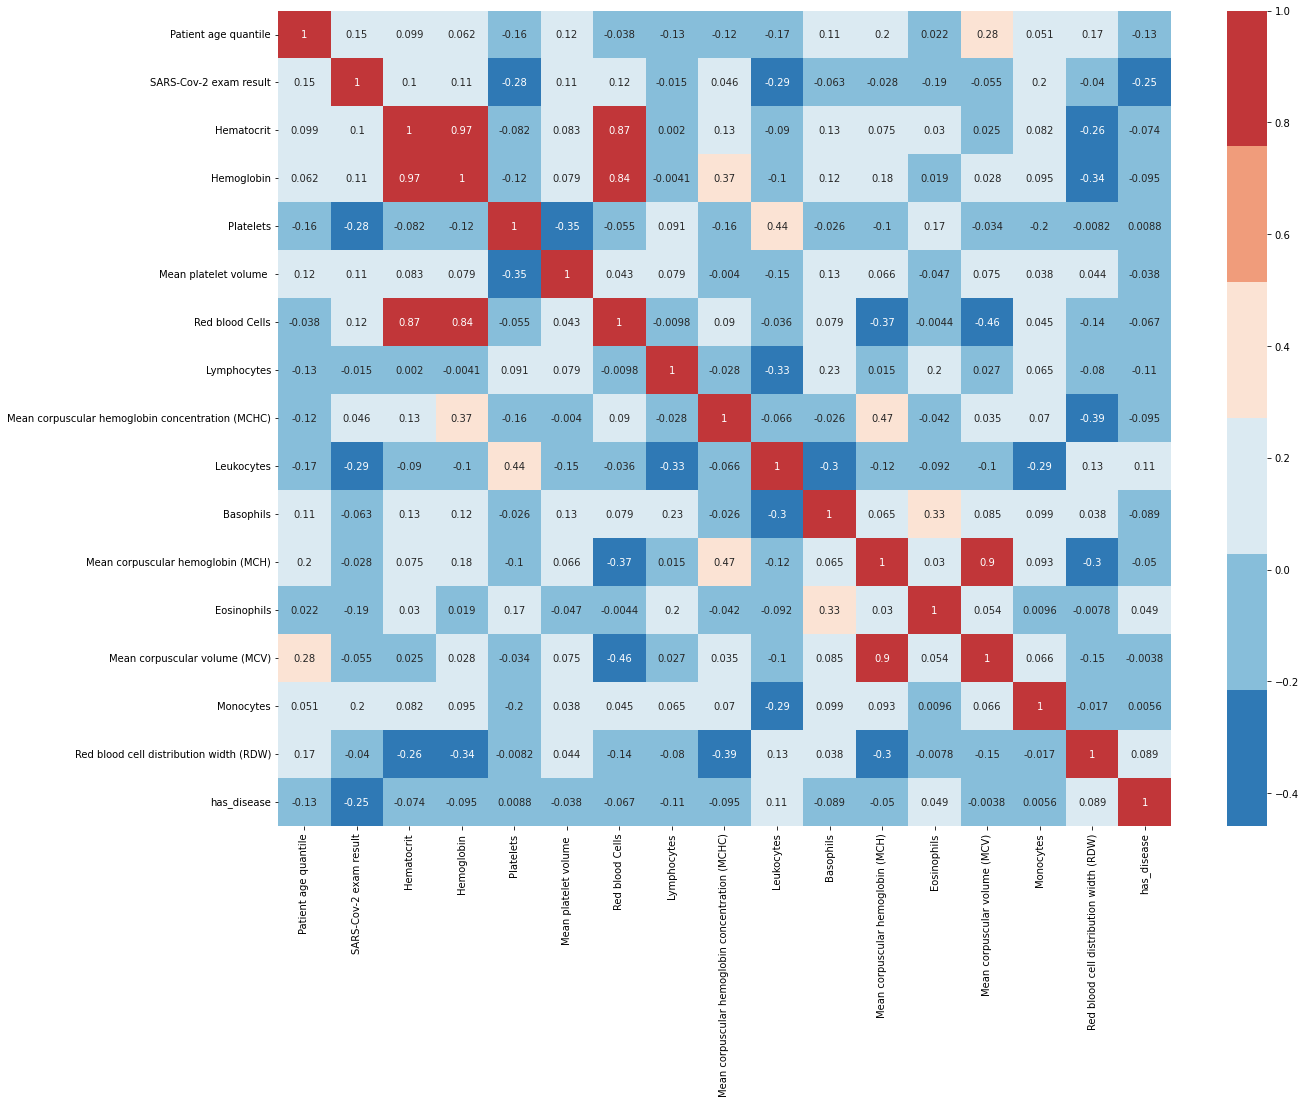

In [39]:
corr = df_feat.drop(["Patient ID",
                     "Patient addmited to regular ward (1=yes, 0=no)",
                     'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                     "Patient addmited to intensive care unit (1=yes, 0=no)"],axis=1).corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap=sns.color_palette('RdBu_r'),annot=True)
plt.show()

Note: 

Using a correlation heatmap, we can get a sense of the most important variables for the target (second line). Leukocytes, Platelets and has_disease have near -0.3 correlation - they will be important variables. Monocytes and age, on the other hand, have a slight positive correlation.

Some features have a high correlation within themselves, so we have to make decisions in order to reduce noise. Hematocrit and Hemoglobin basically mean the same thing (0.97 correlation). They have very high correlation with Red blood Cells as well (0.87 and 0.84, respectively). Their correlations with the target are very similar as well, so I'll keep the one with the highest (Red Blood Cells, 0.12). The other two hightly correlated variables are MCV and MCH - in this case, MCV is more correlated to the target (-0.055 vs. -0.028), so I'll keep it.

- Keep:MCV,Red Blood Cells
- Remove: MCH,Hematocrit,Hemoglobin

In [40]:
df_feat = df_feat.drop(["Mean corpuscular hemoglobin (MCH)","Hematocrit","Hemoglobin"],axis=1)
#Update features
features = [f for f in features if f not in ["Mean corpuscular hemoglobin (MCH)",'Hematocrit','Hemoglobin']]

### Retrain Simple Random Forest

In [41]:
X = df_feat[features]
y = df_feat['SARS-Cov-2 exam result'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
print("SPLIT between test and train!")

#Apply RandomForest
rf = RandomForestClassifier(n_estimators=100,max_features="sqrt",random_state=42)
fitRandomForest(rf)

SPLIT between test and train!
Confusion Matrix: 
 [[101   3]
 [ 11   6]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       104
           1       0.67      0.35      0.46        17

    accuracy                           0.88       121
   macro avg       0.78      0.66      0.70       121
weighted avg       0.87      0.88      0.87       121

Accuracy Score: 0.8842975206611571
Recall Score: 0.35294117647058826
AUC: 0.6620475113122172
KS: 0.3240950226244344


Note :
Still far from ideal, but we can see an improvement! Obviously our test set is very small, but we went from 4% Recall to 35%. At least the model has some capacity to distinguish classes.

Next, let's see if we can improve results using GridSearch.

The metric chosen is Recall, since we are more interested in minimizing the False Negatives (people predicted to be healthy, when in fact are infected).

### GridSearch

In [42]:
random_grid = {'n_estimators':[10,50,100,200,300],
               "max_features":["sqrt","log2",5,10,30],
               "max_depth":[2, 8, 16, 32, 64, 128],
               #"min_samples_split":[1, 2, 4, 5, 16, 24],
               "min_samples_leaf":[1, 2, 5, 10, 15, 30]}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf ,param_distributions =random_grid,
                               n_iter = 100,cv=5,
                               scoring='recall',
                               verbose=0,
                               random_state=42,
                               n_jobs=-1)
#Fit the random search model1
fitRandomForest(rf_random)
print(rf_random.best_params_)

Confusion Matrix: 
 [[101   3]
 [  9   8]]
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.73      0.47      0.57        17

    accuracy                           0.90       121
   macro avg       0.82      0.72      0.76       121
weighted avg       0.89      0.90      0.89       121

Accuracy Score: 0.9008264462809917
Recall Score: 0.47058823529411764
AUC: 0.7208710407239819
KS: 0.4417420814479638
{'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 32}


Note: 

Nothing changed. As a next step, let's try to overcome our imbalance problem with an oversampling technique called SMOTE. Basically, SMOTE synthetically creates minority class samples to deal with imbalanced classification. More on the technique can be found on https://arxiv.org/abs/1106.1813

In [43]:
pip install snapml


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Ignorer les avertissements de type FitFailedWarning
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm
from sklearn.model_selection import GridSearchCV
from snapml import RandomForestClassifier as SnapForestClassifier

def fitRandomForest2(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # ConfusionMatrix and Accuracy
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    # AUC and KS
    print("AUC:", roc_auc_score(y_test, y_pred))

# Convertir les données en tableaux NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ["sqrt", "log2", 5, 10, 30],
    'max_depth': [2, 8, 16, 32, 64, 128],
    'min_samples_leaf': [1, 2, 5, 10, 15, 30]
}

Snaprf = SnapForestClassifier(random_state=42)
rf_random = GridSearchCV(Snaprf, param_grid, cv=5, scoring='recall')

# Adapter le modèle de recherche aléatoire
rf_random.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", rf_random.best_params_)
print("Meilleur score :", rf_random.best_score_)

# Utiliser la fonction fitRandomForest2 pour évaluer le modèle avec les meilleurs paramètres
fitRandomForest2(rf_random.best_estimator_)

Meilleurs paramètres : {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Meilleur score : 0.4384615384615385
Confusion Matrix:
 [[100   4]
 [  9   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       104
           1       0.67      0.47      0.55        17

    accuracy                           0.89       121
   macro avg       0.79      0.72      0.75       121
weighted avg       0.88      0.89      0.88       121

Accuracy Score: 0.8925619834710744
Recall Score: 0.47058823529411764
AUC: 0.7160633484162896


### SMOTE

In [45]:
smt = SMOTE(k_neighbors=5,random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

np.bincount(y_train)

array([415, 415])

Note: 
Now our training set has class balance, thanks to synthetic oversampling of minority class.

### Retrain simple Random Forest with SMOTE

In [46]:
rf = RandomForestClassifier(n_estimators=100,max_features="sqrt",random_state=42)
fitRandomForest(rf)

Confusion Matrix: 
 [[100   4]
 [  7  10]]
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       104
           1       0.71      0.59      0.65        17

    accuracy                           0.91       121
   macro avg       0.82      0.77      0.80       121
weighted avg       0.90      0.91      0.91       121

Accuracy Score: 0.9090909090909091
Recall Score: 0.5882352941176471
AUC: 0.7748868778280543
KS: 0.5497737556561086


Note:

Much better! Oversampling with SMOTE helps the model to distinguish between positive and negative results. We reached a Recall of 65%, which is somewhat acceptable.

Finally, we will try to improve this result using GridSearch + SMOTE.

### GridSearch + SMOTE:

In [47]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions =random_grid,
                               n_iter=100,cv=5,
                               scoring="recall",
                               verbose=0,
                               random_state=42,
                               n_jobs=-1)
#Fit the random search Model
fitRandomForest(rf_random)
print(rf_random.best_params_)

Confusion Matrix: 
 [[96  8]
 [ 6 11]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       104
           1       0.58      0.65      0.61        17

    accuracy                           0.88       121
   macro avg       0.76      0.79      0.77       121
weighted avg       0.89      0.88      0.89       121

Accuracy Score: 0.8842975206611571
Recall Score: 0.6470588235294118
AUC: 0.7850678733031674
KS: 0.5701357466063348
{'n_estimators': 50, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 8}


Note: 
Even better!

I think this is very close to the limit we can achieve, given dataset complications. Recall (71%) is not overly high but still acceptable, and the model is still able to correctly classify non-infected (91% Accuracy). This means that we have reduced the False Negatives (very costly), without having to sacrifice too many False Positives (less expensive, but still would have to test healthy people).

Still, let's try some other models.

### Try Logistic Regression

In [48]:
def fit_and_print(model) :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #ConfusionMatrix and Accuracy
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classification Report \n",classification_report(y_test,y_pred))
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Recall Score:",recall_score(y_test,y_pred))
    #AUC and KS
    print("AUC:",roc_auc_score(y_test,y_pred))
    print("KS:",ks_2samp(y_pred[y_test==0],y_pred[y_test == 1]).statistic)

In [49]:
random_grid = {"penalty":["l1","l2"],
               "C":[100, 10, 1, 0, 0.1, 0.01, 0.001]}
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator=lr,
                               param_distributions=random_grid,
                               n_iter = 100,
                               cv= 5,
                               scoring="recall",
                               verbose=0,
                               random_state =42)
#Fit the random search model
fit_and_print(lr_random)
print(lr_random.best_params_)

Confusion Matrix: 
 [[90 14]
 [ 5 12]]
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.90       104
           1       0.46      0.71      0.56        17

    accuracy                           0.84       121
   macro avg       0.70      0.79      0.73       121
weighted avg       0.88      0.84      0.86       121

Accuracy Score: 0.8429752066115702
Recall Score: 0.7058823529411765
AUC: 0.785633484162896
KS: 0.5712669683257918
{'penalty': 'l2', 'C': 100}


Note: 

Very similar to RF, but less able to correctly classify negative class.

### Try KNN

In [50]:
random_grid = {
    "n_neighbors":[2, 3, 5, 8, 10, 12, 15, 20, 30],
    "weights":['uniform','distance'],
    "p":[1,2,3]
}
knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(estimator=knn,
                                param_distributions=random_grid,
                                n_iter=100,
                                cv=5,
                                scoring="recall",
                                verbose=0,
                                random_state=42)
#Fit the random search model
fit_and_print(knn_random)
print(knn_random.best_params_)

Confusion Matrix: 
 [[81 23]
 [ 8  9]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       104
           1       0.28      0.53      0.37        17

    accuracy                           0.74       121
   macro avg       0.60      0.65      0.60       121
weighted avg       0.82      0.74      0.77       121

Accuracy Score: 0.743801652892562
Recall Score: 0.5294117647058824
AUC: 0.6541289592760181
KS: 0.3082579185520362
{'weights': 'distance', 'p': 1, 'n_neighbors': 2}


Note :
Note very helpfull

### Try SVM

In [51]:
random_grid = {
    "C":[0.1, 1, 10, 100, 500],
    "gamma":["auto",1, 0.1, 0.01, 0.001],
    "kernel":['linear',"poly","rbf","sigmoid"]}
svc = SVC()
svc_random = RandomizedSearchCV(estimator =svc ,
                                param_distributions = random_grid,
                                n_iter=100,
                                cv=5,
                                scoring="recall",
                                verbose=0,
                                random_state=42,
                                n_jobs=-1)
#Fit the random search model
fit_and_print(svc_random)
print(svc_random.best_params_)

Confusion Matrix: 
 [[91 13]
 [ 9  8]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       104
           1       0.38      0.47      0.42        17

    accuracy                           0.82       121
   macro avg       0.65      0.67      0.66       121
weighted avg       0.84      0.82      0.83       121

Accuracy Score: 0.8181818181818182
Recall Score: 0.47058823529411764
AUC: 0.6727941176470589
KS: 0.34558823529411764
{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}


Note: 

Inverse of the first Random Forest we fitted. Here it basically tells that everyone is infected. Even though we wouldn't have any False Negatives, we would have to test everyone - this is useless.

### XGBOOST 

In [52]:
#import  xgboost as xgb

"""random_grid = {"n_estimators":[15, 25, 50],
               "learning_rate":[0.1, 0.05, 0.01],
               "max_depth":[2, 8, 16],
               "colsample_bytree":[0.3, 0.8, 1],
               "gammma":[0.1,5]}
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')
xgb_random = RandomizedSearchCV(estimator=xgb_clf,
                                param_distributions=random_grid,
                                n_iter=50,
                                cv=5,
                                scoring="recall",
                                verbose=0,
                                random_state=42,
                                n_jobs=-1)
#Fit the random search model
fit_and_print(xgb_random)
print(xgb_random.best_params_)"""

'random_grid = {"n_estimators":[15, 25, 50],\n               "learning_rate":[0.1, 0.05, 0.01],\n               "max_depth":[2, 8, 16],\n               "colsample_bytree":[0.3, 0.8, 1],\n               "gammma":[0.1,5]}\nxgb_clf = xgb.XGBClassifier(objective=\'binary:logistic\')\nxgb_random = RandomizedSearchCV(estimator=xgb_clf,\n                                param_distributions=random_grid,\n                                n_iter=50,\n                                cv=5,\n                                scoring="recall",\n                                verbose=0,\n                                random_state=42,\n                                n_jobs=-1)\n#Fit the random search model\nfit_and_print(xgb_random)\nprint(xgb_random.best_params_)'

Similar result to Random Forest, but not better. XGB probably would have achieved the same result as RF (only 1 FN more) with a more thorough GridSearch. Problem is, dataset is too small!

### Feature Importances

Platelets                                           22.406875
Leukocytes                                          21.811429
has_disease                                         14.386839
Eosinophils                                          9.100218
Monocytes                                            6.292072
Mean platelet volume                                 5.420258
Red blood Cells                                      4.160125
Lymphocytes                                          3.878287
Basophils                                            3.819169
Mean corpuscular volume (MCV)                        2.426519
Patient age quantile                                 2.376348
Mean corpuscular hemoglobin concentration (MCHC)     2.275723
Red blood cell distribution width (RDW)              1.646138
Name: importance, dtype: float64


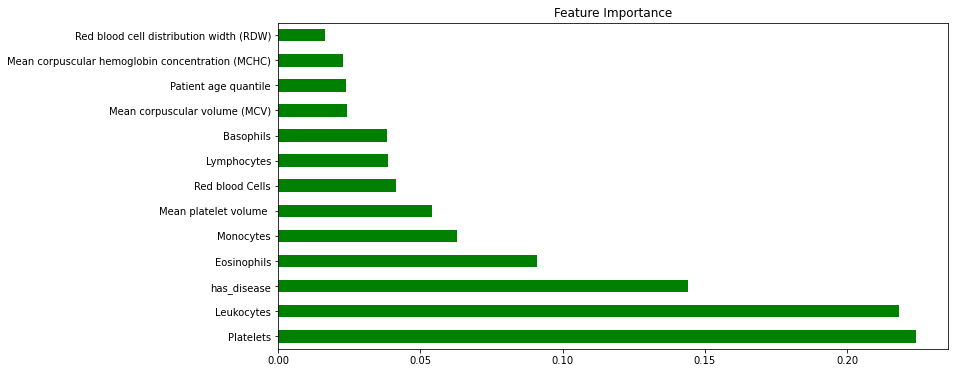

In [53]:
feature_importances = pd.DataFrame(rf_random.best_estimator_.feature_importances_,
                                index = features,
                                    columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
feature_importances.importance.plot(kind='barh', color='green')
plt.title('Feature Importance')
plt.show()
feature_importances.style.format({'importance': '{:.1%}'.format})
print(feature_importances.importance*100)

The most important features are very similar to the ones we saw on the correlation heatmap.

Leukocytes
Platelets
has_disease
Eosionophils
Mean platelet volume
Monocytes
Another good thing about the model is that age is the third less important feature - I think this is good, given that we know that there is an age relationship, but would like other features to be more relevant.

Lastly, let's use SHAP Values to help us understand our model's predictions. You can read more about this wonderful technique on https://christophm.github.io/interpretable-ml-book/shap.html

### SHAP Values

In [54]:
import shap

X = df_feat[features] 
y = df_feat['SARS-Cov-2 exam result'].values
_, X_test, _, _ = train_test_split(X, y, test_size=0.2,
                                   stratify=y, random_state=42)

y_pred = rf_random.best_estimator_.predict(X_test)

explainer = shap.TreeExplainer(rf_random.best_estimator_)
expected_value = explainer.expected_value[1]

shap_values = explainer.shap_values(X_test)[1]
shap_interaction_values = explainer.shap_interaction_values(X_test)[1]
np.save('shap_values.npy', shap_values)

print(expected_value)

0.5026987951807229


X = df_feat[features]
y = df_feat['SARS-Cov-2 exam result'].values
_,X_test,_,_ = train_test_split(X,y,test_size=0.2,stratify=0.2,
                                random_state=42)

y_pred = rf_random.best_estimator_.predict(X_test)

explainer = shap.TreeExplainer(rf_random.best_estimator_)
expected_value = explainer.shape_values(X_test)[1]

shap_values = explainer.shape_values(X_test)[1]
shap_interaction_values = explainer.shape_interaction_values(X_test)[1]
np.save("shap_values.npy",shap_values)

print(expected_value)

Note : 

We can use Decision Plots to see, for each instance, the impact of each variable on the base value. In all subsequent plots the base value is 0.5; values above it are classified as positive and below it, negative. Features are ranked in the plot by their importance to that specific observation.

### True Positive Examples

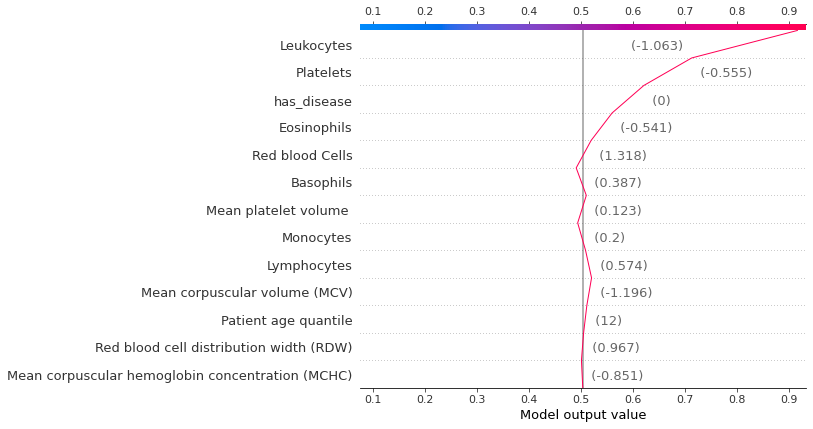

In [55]:
import shap
shap.decision_plot(expected_value,shap_values[34],X_test.iloc[34])

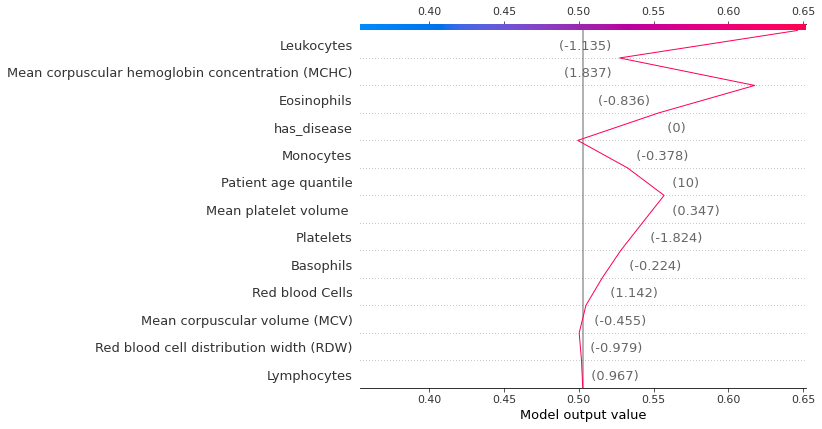

In [56]:
shap.decision_plot(expected_value,shap_values[87],X_test.iloc[87])

Note:

In this example, we can see that considering all other variables besides has_disease, this patient would be classified as positive. The fact that he/she has a disease, however, "abruptly" changes the decision to not infected. This is an indication that blood variables are similar to a COVID-19 infected person, but this is due to the fact that he/she has another disease.

False Positive Example

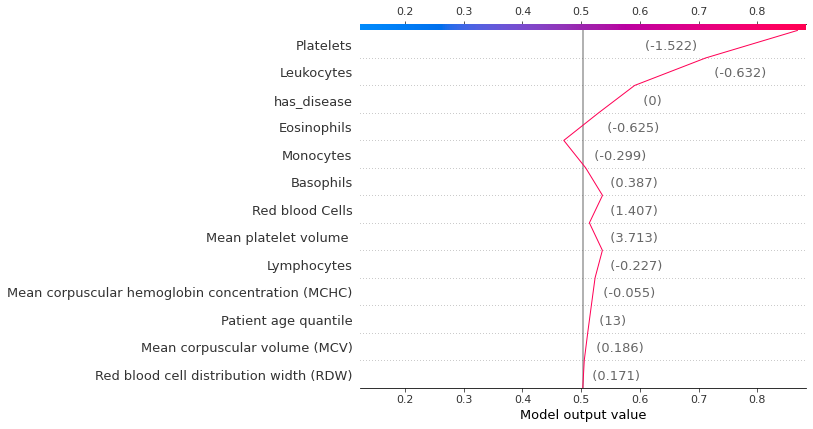

In [57]:
shap.decision_plot(expected_value,shap_values[57],X_test.iloc[57])

False positives are tricky, at least to me, to analyze, since I have little medical expertise. But hopefully a doctor can extract knowledge from this kind of plot (from what I understand, this person has Platelets and Leukocytes very similar to healthy people, but was infected).

### False Negative Example

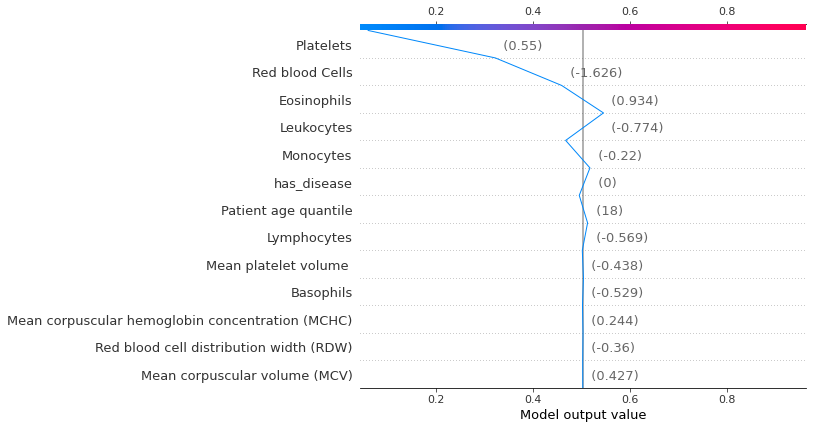

In [58]:
shap.decision_plot(expected_value,shap_values[40],X_test.iloc[40])

The same analysis can be done to the false negatives. In this case, the two variables that greatly pushed the prediction to "healthy" were Platelets and Red blood Cells. This indicates that, for this individual, even though he was infected, this two variables indicate otherwise.

### Dependence Plots

Another way SHAP can help us understand model predictions is to use Dependence Plots. They plot the SHAP values for a given variable on y axis and variable value on x axis. The plot automatically colors the points with a variable estimated to have the higher correlation. Positive SHAP values indicate that the feature is "helping" the positive class (i.e., pushing the prediction to be "infected"), whereas negative SHAP values indicate that the feature is pushing the prediction to be "not-infected". This way, we can see how SHAP values vary with feature value.

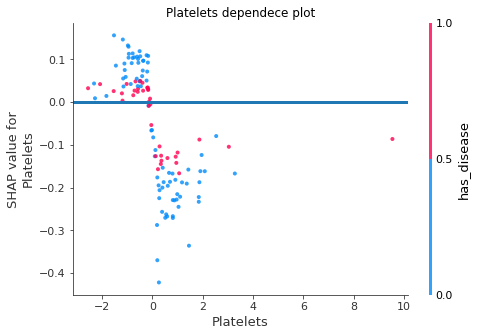

In [59]:
shap.dependence_plot("Platelets",shap_values,X_test,alpha=0.8,show=False)
plt.title("Platelets dependece plot")
plt.axhline(0,lw=3)
plt.show()

Note:

For platelets, there is a clear relationship between low values (help "infected") and high values (help "non-infected"), though it is not linear and somewhat muddy around 0.

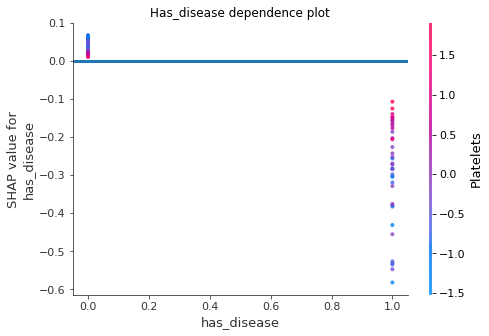

In [60]:
shap.dependence_plot("has_disease",shap_values,X_test,alpha=0.8,show=False)
plt.title("Has_disease dependence plot")
plt.axhline(0,lw=3)
plt.show()

Note :

Another good sign that our model is calibrated is that all people with a previous disease helped the prediction to be not-infected. And, given that the person has a disease, the higher the value of Platelets (blue points), the more the prediction is pushed towards "not-infected"
        

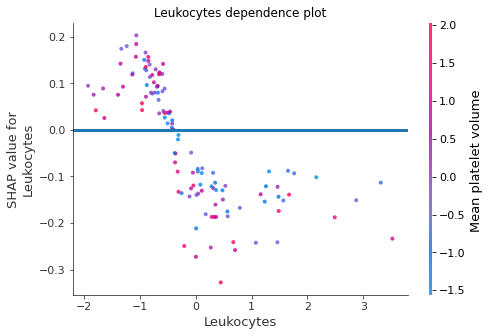

In [61]:
shap.dependence_plot("Leukocytes",shap_values,X_test,alpha=0.8,show=False)
plt.title("Leukocytes dependence plot")
plt.axhline(0,lw=3)
plt.show()

Note:
Basically the same behavior of Platelets is observed for Leukocytes. 
        

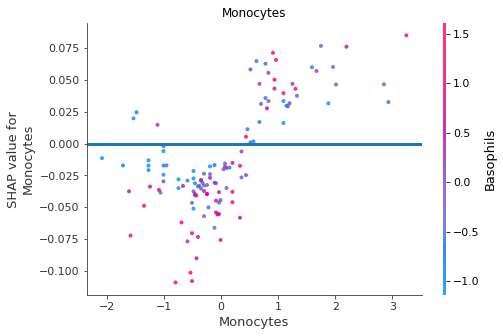

In [69]:
shap.dependence_plot("Monocytes",shap_values,X_test,alpha=0.8,show=False)
plt.title("Monocytes")
plt.axhline(0,lw=3)
plt.show()

Note:

For Monocytes, the trend is clear as well. Higher values push the predictions to "infected      

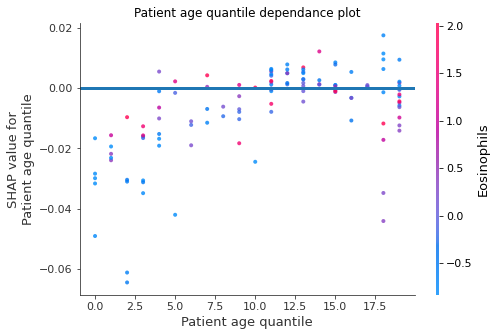

In [64]:
shap.dependence_plot("Patient age quantile",shap_values,X_test,alpha=0.8,show=False)
plt.title("Patient age quantile dependance plot")
plt.axhline(0,lw=3)
plt.show()

Note :

And for the age, the known relationship of increasing risk is observed as well. There is a clear trend: model pushes predictions towards "infected" for older patients. All patients below age quantile 10 pushed prediction towards "not infected". However, for older people sometimes the model pushes observations towards "not infected", meaning that age does not have a perfect linear relationship with infection.

### Summary Plot

We can look at a Summary Plot as well - this gives all SHAP values for every feature, displayed horizontally. Feature value is used as color and features are ranked by importance.

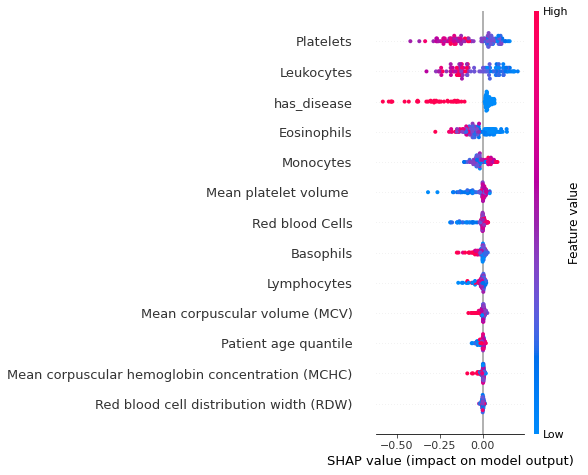

In [65]:
shap.summary_plot(shap_values,X_test)

Note: 

This confirms and summarizes all of our previous findings. Low values for Leukocytes, Platelets and Eosinophils are a strong indicator of COVID-19 presence, as well as the has_disease variable. High values of Monocytes are a strong indicator of COVID-19 presence. For the other variables SHAP Values are highly skewed towards "not infected" (negative values), with a somewhat "muddy terrain" around 0.

### All False Negative (FN) Predictions

We again use a decision plot, this time to look at the prediction paths of all the 5 False Negatives.

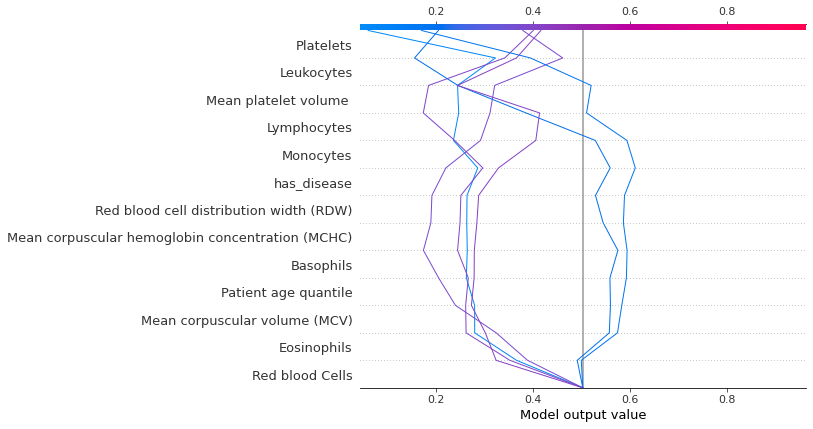

In [66]:
X_fn = X_test[(y_pred==0)&(y_test ==1)]
shap_fn = shap_values[(y_pred==0)&(y_test ==1)]

shap.decision_plot(expected_value,shap_fn,X_fn,feature_order="hclust")

The main takeaway is that there is no "single path" that leads to False Negative predictions. Two of the classifications were close to the decision threshold (two lines near 0.4), while the other 3 were "pretty sure the patient is not infected". Once again, I have no medical expertise to thoroughly analyze this, but hopefully a doctor can make sense of this.

## Conclusion

I conducted an analysis, based on 101 variables from 5644 records kindly provided by Hospital Israelita Albert Einstein, to predict if a patient was infected by COVID-19 or not. I chose to maximize the Recall metric, given how costly a False Negative is.

After dealing with missing data, conducting oversampling with SMOTE and conducting GridSearch with a lot of models, the best result came from Random Forest, with 71% Recall, 91% Accuracy and 82% AUC. This is an acceptable value for Recall without sacrificing Accuracy (thus, few False Positives), and the model should perform much better with more data.

I also used SHAP to better understand model predictions, with the main takeaways being:

Low values for Leukocytes, Platelets and Eosinophils are a strong indicator of COVID-19 presence;
If a person tested positive for any of the diseases contained in the dataset, it is highly likely that he/she will not have the COVID-19;
High values of Monocytes are a strong indicator of COVID-19 presence;
For the other variables SHAP Values are highly skewed towards "not infected", becoming less certain for neutral and positive contributions for "infected";
There is no "single path" that leads to False Negative predictions. The implications and meanings have to be better assessed by a doctor.